In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import time
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Training
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Exporting
import pickle

In [ ]:
df = pd.read_csv('/content/heart_disease_dataset.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


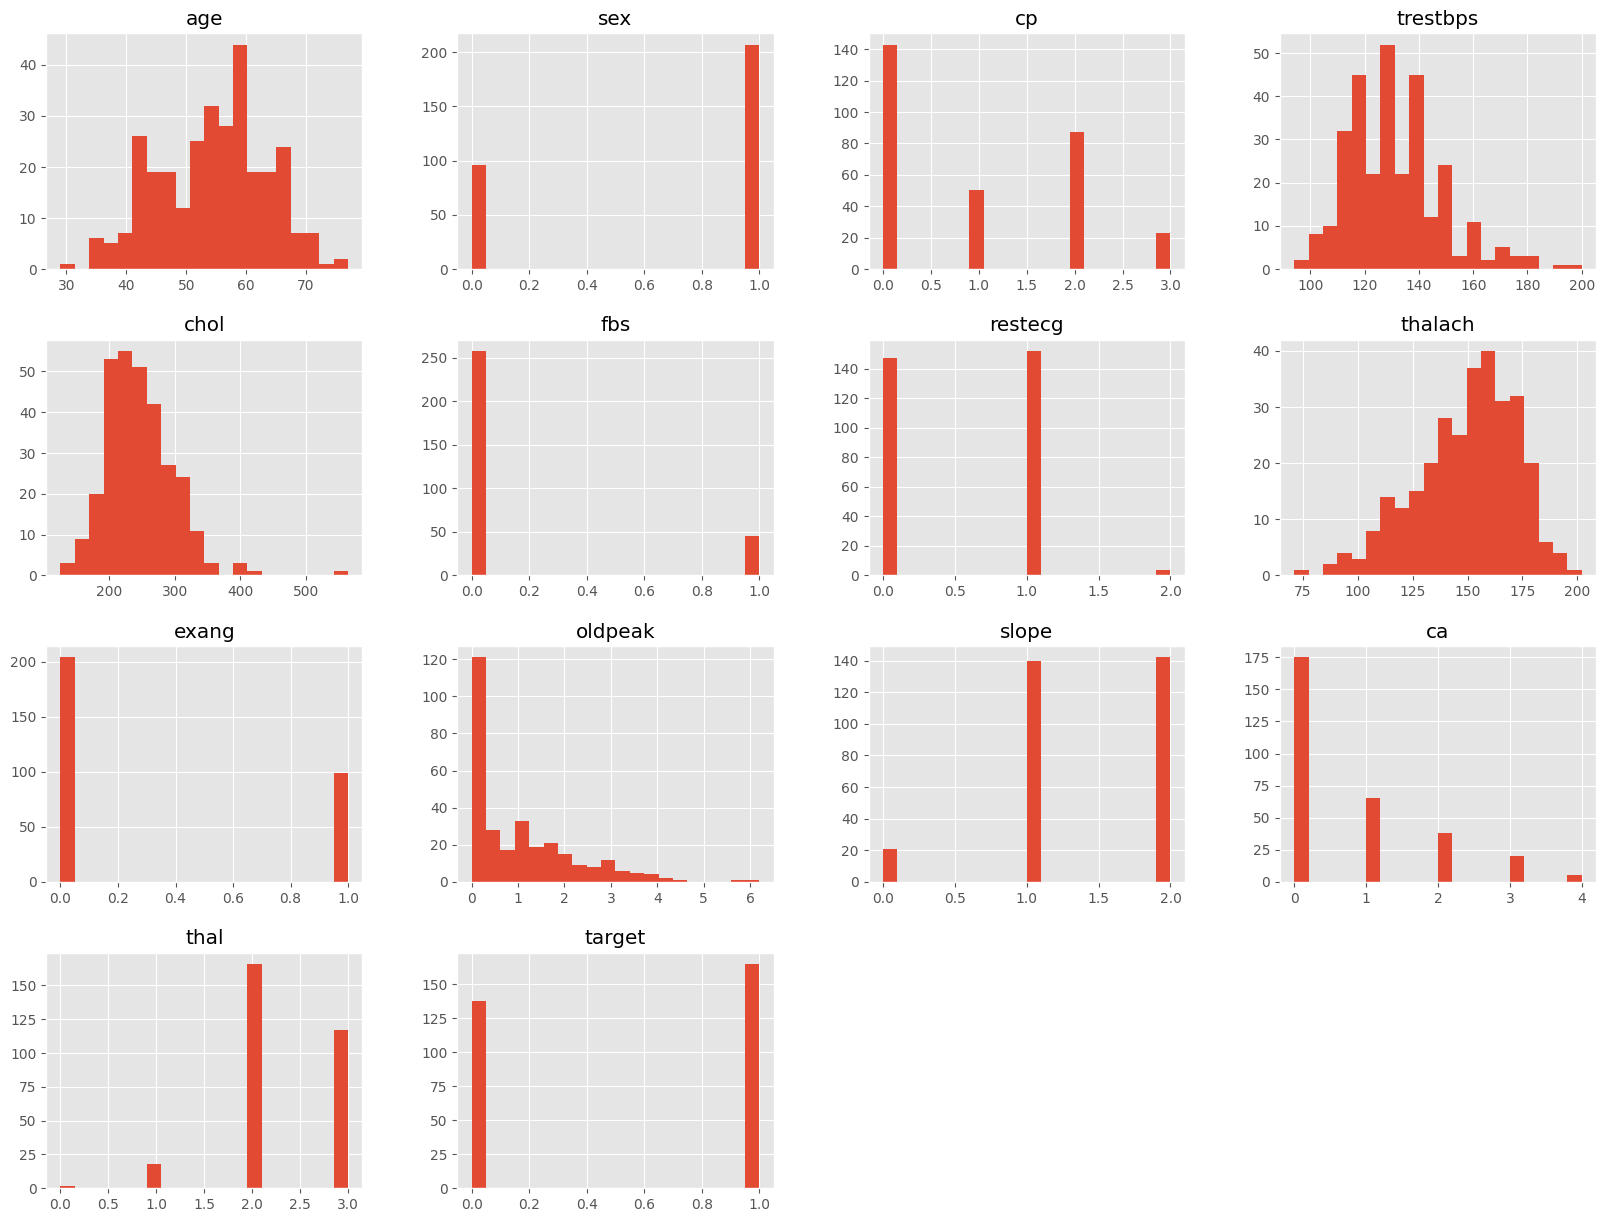

In [ ]:
df.hist(bins=20, figsize=(20,15))
plt.show()

In [ ]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

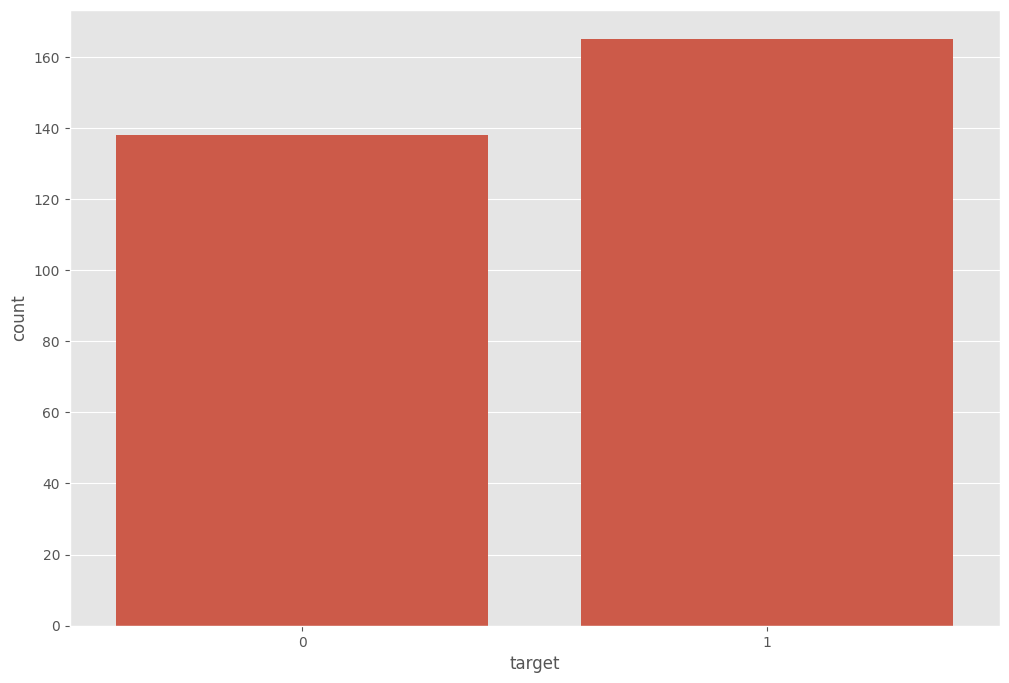

In [ ]:
sns.countplot(x='target', data=df)

In [ ]:
num_class_0 = np.sum(df.values == 0)
num_class_1 = np.sum(df.values == 1)

class_imbalance_ratio = num_class_0 / (num_class_0 + num_class_1)
print(f"Class imbalance ratio: {class_imbalance_ratio}")

Class imbalance ratio: 0.5732797140303842


In [ ]:
df.duplicated().sum()

1

In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]

# Print the duplicate rows
print(duplicate_rows)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
163      2   4     2       1  
164      2   4     2       1  


<Axes: >

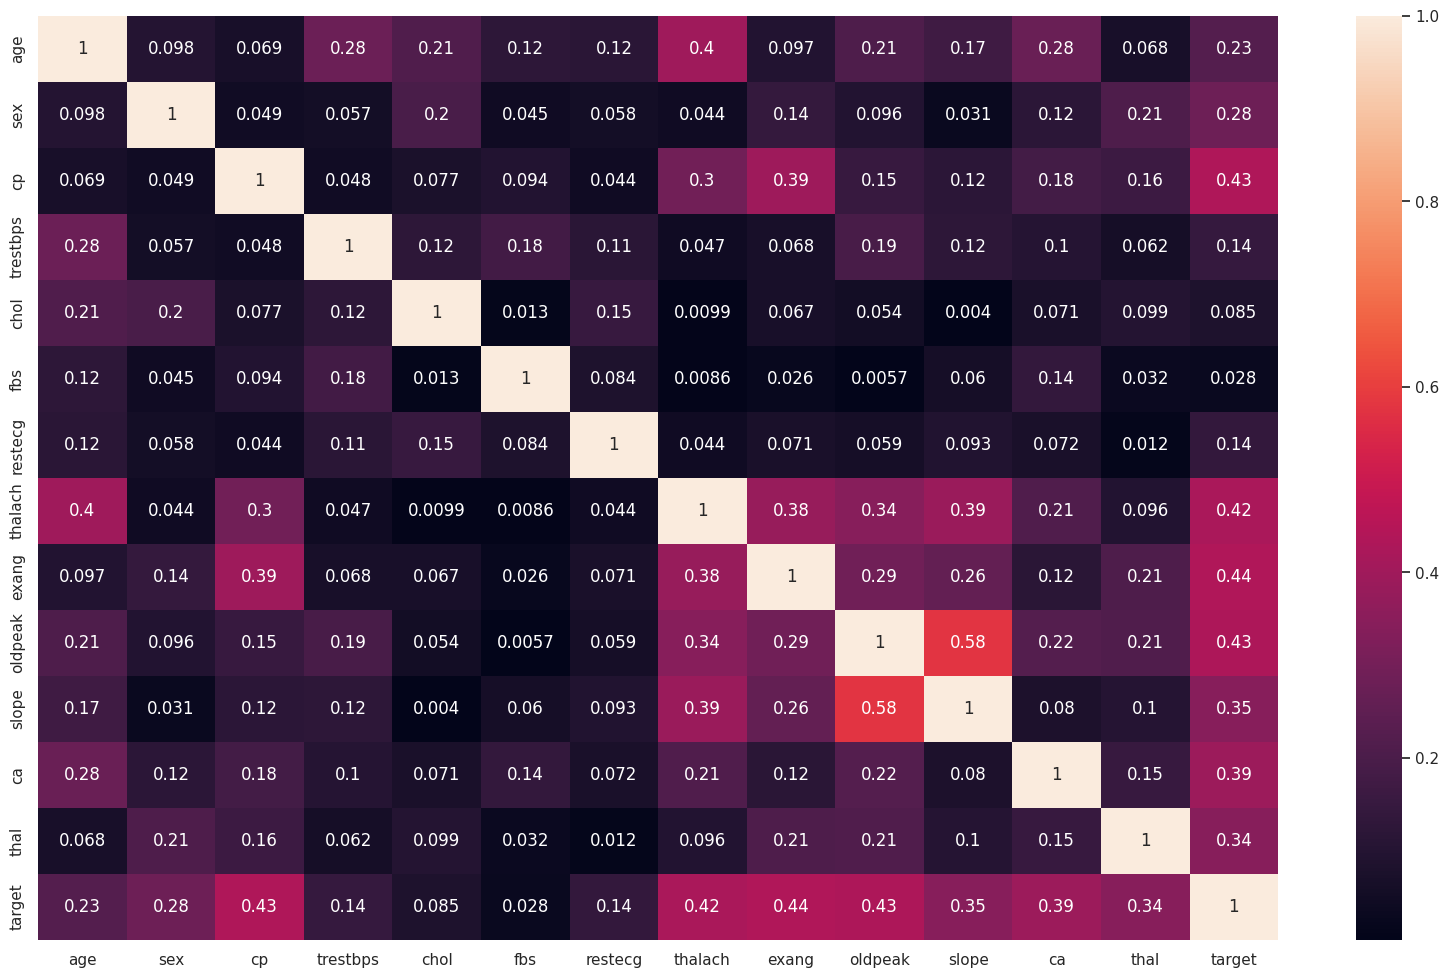

In [ ]:
sns.set(rc={'figure.figsize':(20,12)})
sns.heatmap(df.corr().abs(),annot=True)

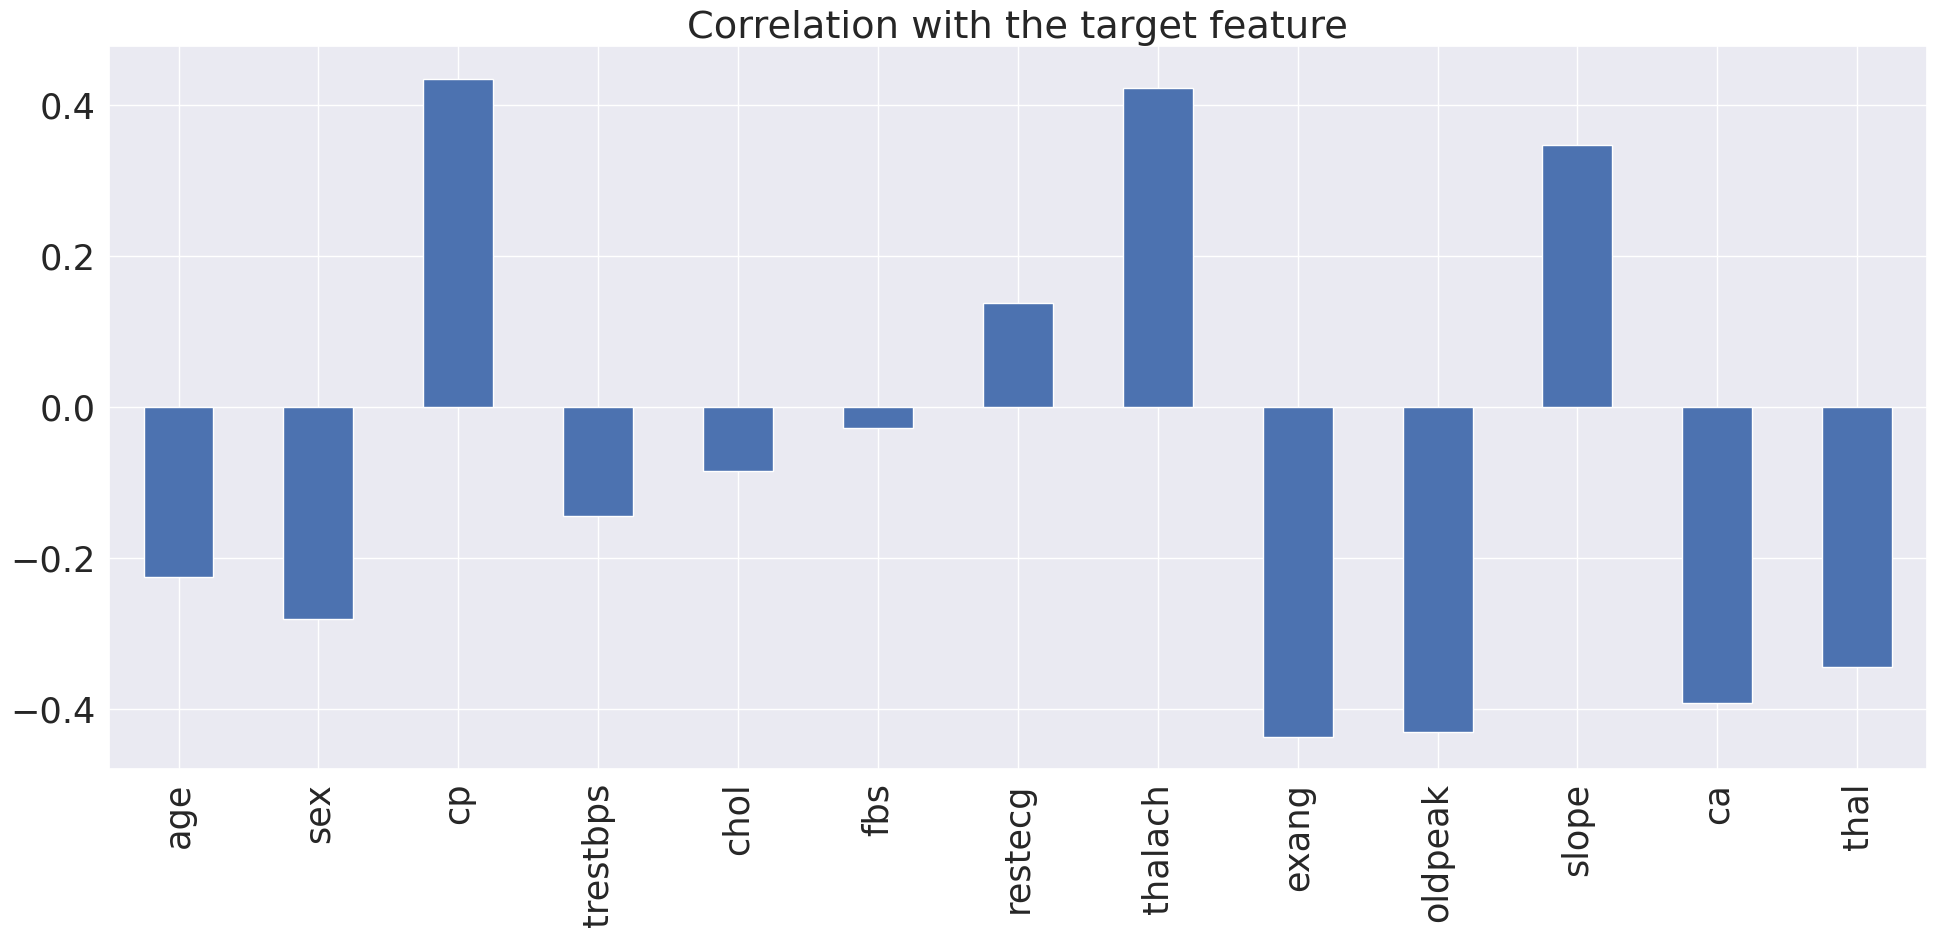

In [ ]:
sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10),
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [ ]:
df['chol'].max()

564

In [ ]:
print("max: ", df['trestbps'].max())

print("min: ", df['trestbps'].min())

max:  200
min:  94


**Data Cleaning and Preprocessing**

In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
dfIQR=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]


dfIQR.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
Q1 = dfIQR.quantile(0.25) # Calculate 1st quantile
Q3 = dfIQR.quantile(0.75) # Calculate 3rd quantile


IQR = Q3-Q1

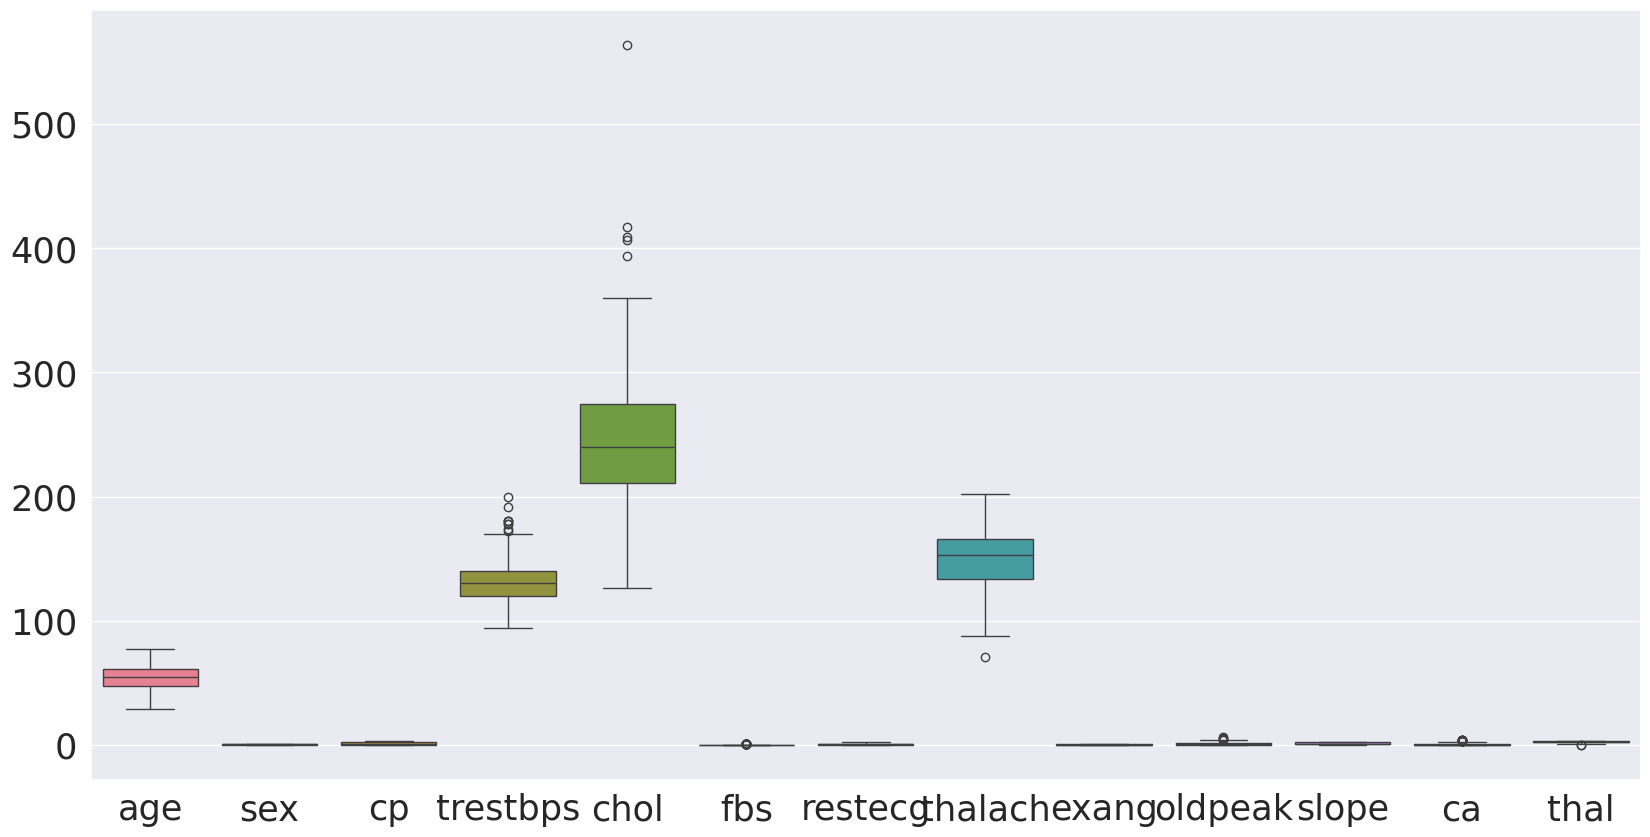

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])
plt.show()

In [ ]:
df.duplicated().sum()

1

**Feature Selection**

In [ ]:
# Separate independent and dependent variables
X = df.iloc[:, :-1]  # independent columns
y = df.iloc[:, -1]    # target column


# We have 13 features
bestfeatures = SelectKBest(score_func=chi2, k=10) # Apply SelectKBest class to extract top 10 best features
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns


print(featureScores.nlargest(9, 'Score'))

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095


In [ ]:
drop_columns = ['restecg', 'trestbps', 'slope']
df = df.drop(drop_columns, axis=1)

In [ ]:
x = df.iloc[:, :-1] # Independent variables
y = df.iloc[:, -1] # Dependent variable


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 0)

Check balance class

In [ ]:
print('\nBalance of positive and negative classes (%):')
y_train.value_counts(normalize=True)*100


Balance of positive and negative classes (%):


target
1    54.132231
0    45.867769
Name: proportion, dtype: float64

**Implementation and Evaluation of the algorithms**

In [ ]:
def fit_and_evaluate_the_model(model, x_train, y_train, x_test, y_test):
    # Fit the training set to the model
    model.fit(x_train, y_train)

    # The model predicts the labels of the features in the test set
    y_pred = model.predict(x_test)


    print(classification_report(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))


    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, fmt = "g")


    # Plot the confusion matrix
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')


    # Display the visualisation of the Confusion Matrix
    plt.rcParams["figure.figsize"] = (5, 3)
    plt.show()

In [ ]:
def find_best_parameters(model, param_grid, x_train, y_train, x_test, y_test):

    # Create a grid search object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="recall")

    # Fit the grid search object to the training data
    grid_search.fit(x_train, y_train)

    # Print the best parameters
    print("Best Parameters:", grid_search.best_params_)

    # Get the result in a tabular format
    result = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),
           pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Recall"])],axis=1)


    return result.sort_values(by="Recall", ascending=False)

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Recall:  0.8823529411764706


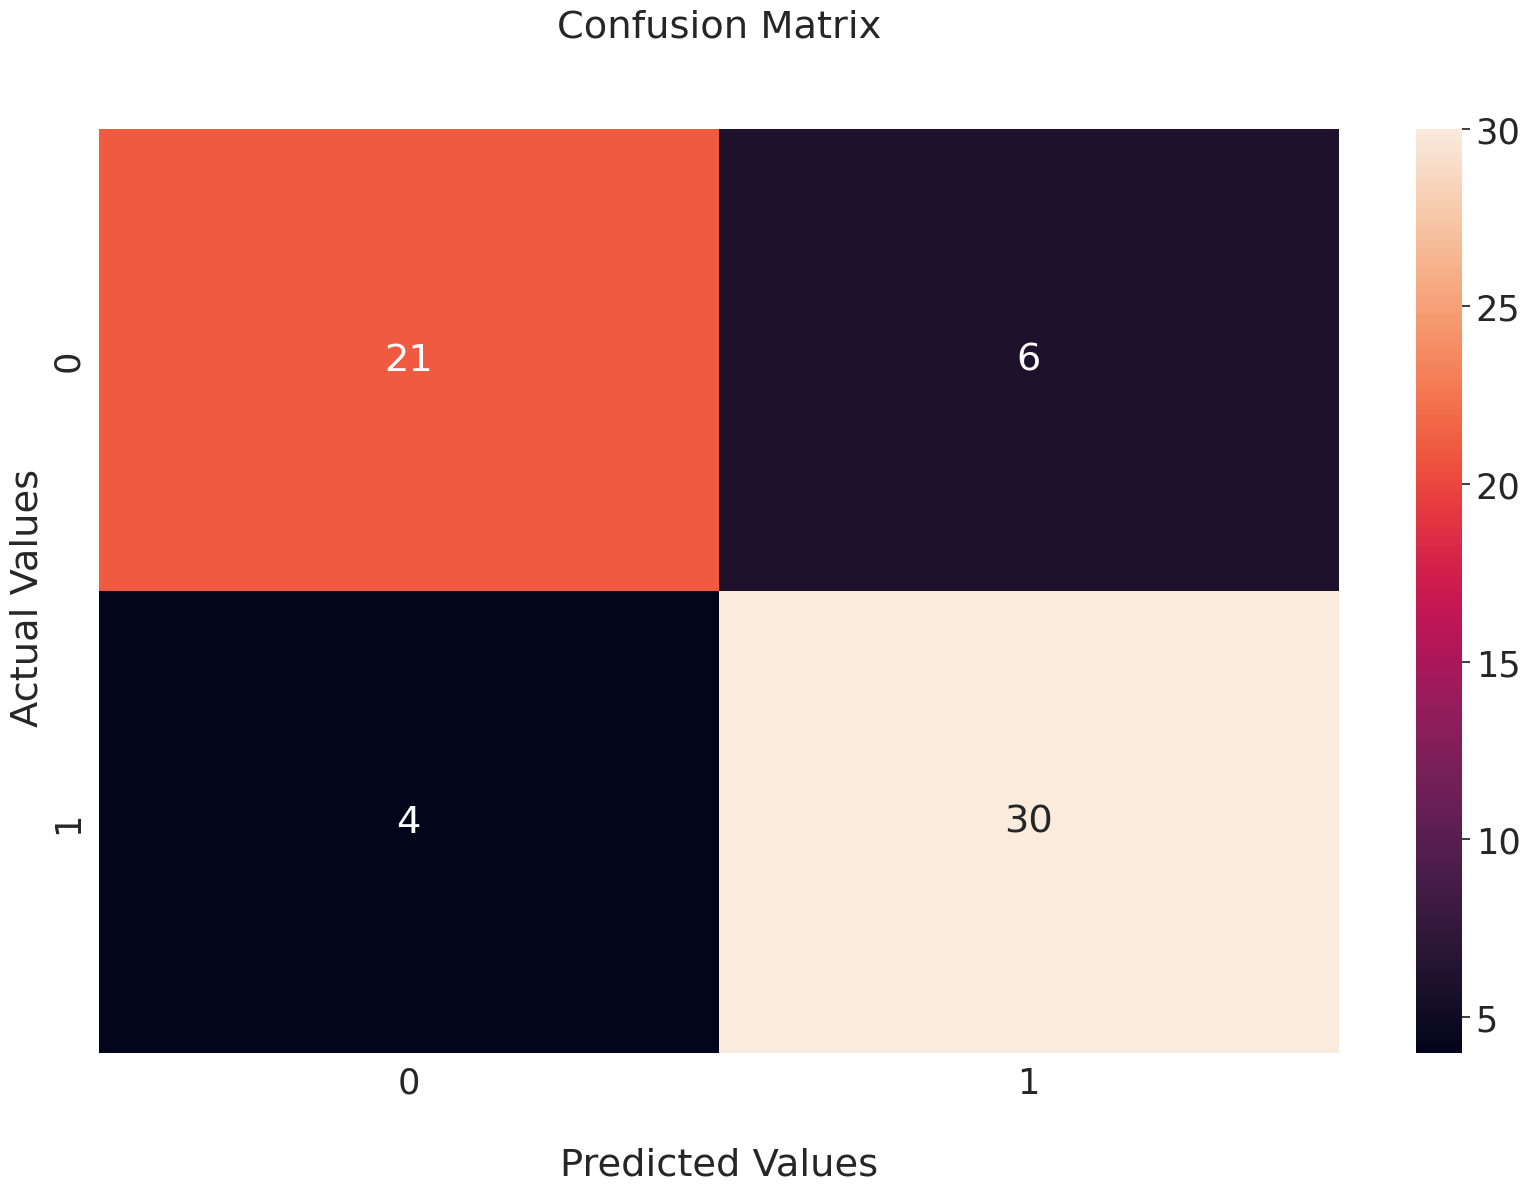

In [ ]:
lr = LogisticRegression()


fit_and_evaluate_the_model(lr, x_train, y_train, x_test, y_test)

**Tuned Logistic Regression using GridSearchCV**

In [ ]:
lr0 = LogisticRegression()

# Create a parameter grid
param_grid = {'C': [100, 10, 1.0, 0.1, 0.01], ## Regularization --- high C => stronger regularization
              'penalty': ['l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']
             }


best_params = find_best_parameters(lr0, param_grid, x_train, y_train, x_test, y_test)
best_params

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


,C,penalty,solver,Recall
10,0.10,l2,lbfgs,0.900855
11,0.10,l2,liblinear,0.900855
1,100.00,l2,lbfgs,0.893732
4,10.00,l2,lbfgs,0.893732
9,0.10,l2,newton-cg,0.885755
7,1.00,l2,lbfgs,0.878348
2,100.00,l2,liblinear,0.870940
3,10.00,l2,newton-cg,0.870940
5,10.00,l2,liblinear,0.870940
6,1.00,l2,newton-cg,0.870655


In [ ]:
first_pair = next(iter((best_params.loc[:, ~best_params.columns.isin(['Recall'])].to_dict(orient='index').items())) )
first_pair[1]

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Recall:  0.8823529411764706


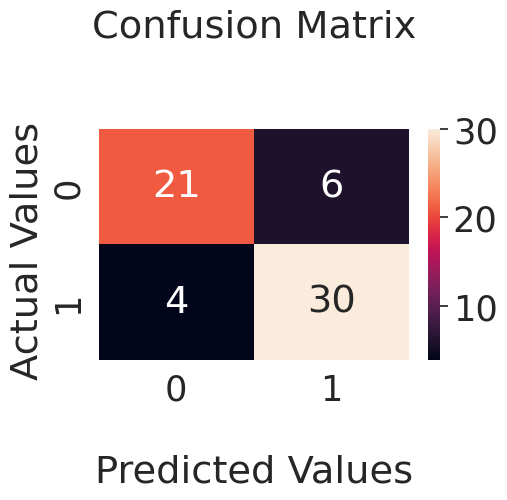

In [ ]:
lr1 = LogisticRegression(**first_pair[1])


fit_and_evaluate_the_model(lr1, x_train, y_train, x_test, y_test)

**Decision Tree**

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Recall:  0.7941176470588235


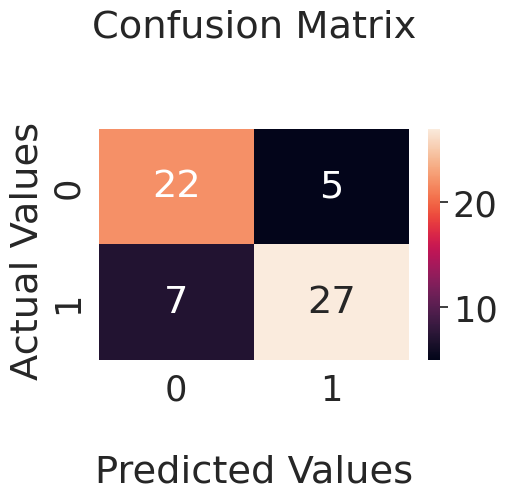

In [ ]:
decision_tree = DecisionTreeClassifier()


fit_and_evaluate_the_model(decision_tree, x_train, y_train, x_test, y_test)

**Tuned Decision Tree using GridSearchCV**

In [ ]:
decision_tree0 = DecisionTreeClassifier()


# Create a parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


best_params = find_best_parameters(decision_tree0, param_grid, x_train, y_train, x_test, y_test)
best_params

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


,criterion,max_depth,min_samples_leaf,min_samples_split,Recall
9,gini,5.0,1,2,0.848148
45,entropy,5.0,1,2,0.832479
10,gini,5.0,1,5,0.825356
46,entropy,5.0,1,5,0.825071
49,entropy,5.0,2,5,0.825071
...,...,...,...,...,...
67,entropy,15.0,2,5,0.741026
39,entropy,NaN,2,2,0.740741
58,entropy,10.0,2,5,0.733618
54,entropy,10.0,1,2,0.733333


In [ ]:
first_pair = next(iter((best_params.loc[:, ~best_params.columns.isin(['Recall'])].replace({np.nan: None}).to_dict(orient='index').items())) )
first_pair[1]

{'criterion': 'gini',
 'max_depth': 5.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

**Random Forest**

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Recall:  0.8823529411764706


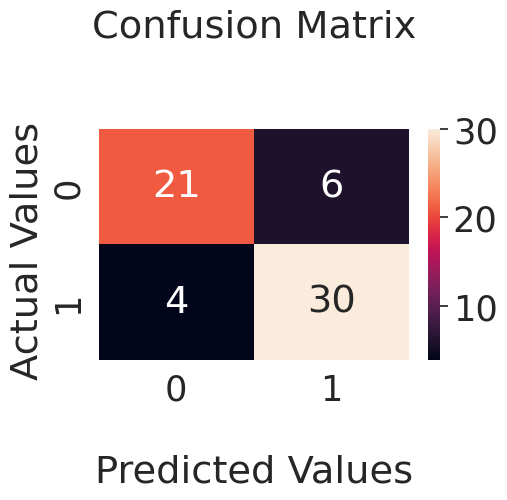

In [ ]:
rfc = RandomForestClassifier()


fit_and_evaluate_the_model(rfc, x_train, y_train, x_test, y_test)

In [ ]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}


rfc0 = RandomForestClassifier()


best_params = find_best_parameters(rfc0, param_grid, x_train, y_train, x_test, y_test)
best_params

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}


,criterion,max_depth,max_features,n_estimators,Recall
11,gini,6,log2,500,0.908832
7,gini,5,log2,500,0.901425
28,entropy,6,sqrt,200,0.901425
31,entropy,6,log2,500,0.901425
33,entropy,7,sqrt,500,0.901425
15,gini,7,log2,500,0.901425
9,gini,6,sqrt,500,0.901425
22,entropy,4,log2,200,0.901425
6,gini,5,log2,200,0.901140
10,gini,6,log2,200,0.893732


In [ ]:
first_pair = next(iter((best_params.loc[:, ~best_params.columns.isin(['Recall'])].to_dict(orient='index').items())) )
first_pair[1]

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 500}

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

Recall:  0.8823529411764706


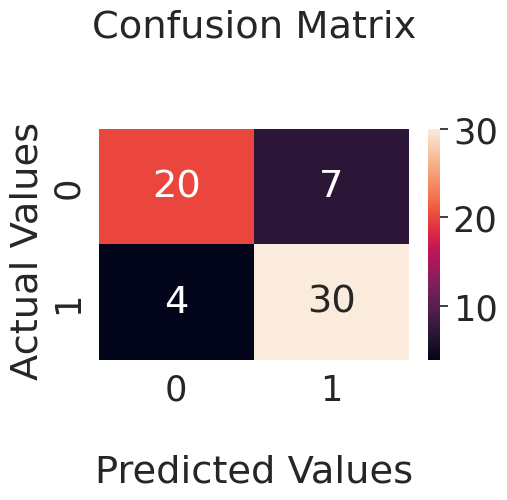

In [ ]:
rfc1 = RandomForestClassifier(**first_pair[1])


fit_and_evaluate_the_model(rfc1, x_train, y_train, x_test, y_test)